<IPython.core.display.Javascript object>


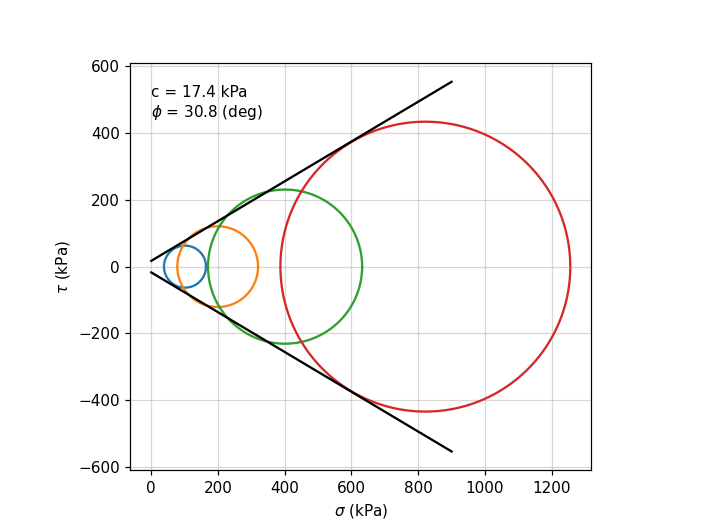

Text(0, 450, 'c = 17.4 kPa \n$\\phi$ = 30.8 (deg)')

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sigma3 = np.asarray([38, 78, 170, 387])
sigma1 = np.asarray([164, 320, 632, 1256])

X = (sigma3 + sigma1)/2.0
Y = (sigma1 - sigma3)/2.0

m, b = np.polyfit(X,Y,1)

phi = np.arcsin(m)
c = b/np.arccos(phi)

def get_mohr_circle(sigma3, sigma1):
    rad = (sigma1 - sigma3)/2.0
    cen = (sigma1 + sigma3)/2.0
    x = []
    y = []
    for i in range(360):
        x.append(cen + rad*np.cos(i*2.0*np.pi/360))
        y.append(rad*np.sin(i*2.0*np.pi/360))
    return([x, y])

fig, ax = plt.subplots(1)
for s3, s1 in zip(sigma3, sigma1):
    circles = get_mohr_circle(s3, s1)
    ax.plot(circles[0], circles[1])
ax.set_aspect('equal')
ax.grid(True,alpha=0.5)
ax.set_xlabel(r'$\sigma$ (kPa)')
ax.set_ylabel(r'$\tau$ (kPa)')

X = np.linspace(0,900,100)
Y = c + X*np.tan(phi)
ax.plot(X,Y, c='black')
ax.plot(X,-Y, c='black')

ax.annotate('c = ' + str(np.round(c,1)) + ' kPa \n' + r'$\phi$ = ' + str(np.round(phi*180/np.pi,1)) + ' (deg)', xy=(0,450))